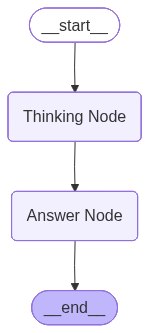

In [4]:
from langchain_core.pydantic_v1 import BaseModel
from IPython.display import Image, display
from langgraph.graph import StateGraph, START,END
from typing import TypedDict
from typing import Literal
import random  

class OverallNode(BaseModel):
    question : str
    answer : str
    note : str

def ThinkingNode(state: OverallNode):
    state.answer = "bye"
    state.note = "no more questions"
    return state

def AnswerNode(state: OverallNode):
    state.answer = "bye Akshay"
    return state

graph = StateGraph(OverallNode)
graph.add_node("Answer Node", AnswerNode)
graph.add_node("Thinking Node", ThinkingNode)

graph.add_edge(START , "Thinking Node")
graph.add_edge("Thinking Node", "Answer Node")
graph.add_edge("Answer Node", END)

graph = graph.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
result = graph.invoke(OverallNode(
    question="What is the capital of France?",
    answer="",
    note=""
))
print(result)

{'question': 'What is the capital of France?', 'answer': 'bye Akshay', 'note': 'no more questions'}


C:\Users\APatil\AppData\Local\Temp\ipykernel_17208\2120623962.py:25: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  graph = StateGraph(InputState , input = InputState , output = OutputState)
C:\Users\APatil\AppData\Local\Temp\ipykernel_17208\2120623962.py:25: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  graph = StateGraph(InputState , input = InputState , output = OutputState)


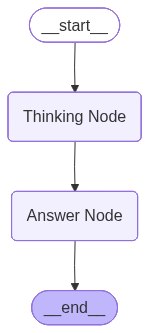

In [24]:
class InputState(BaseModel):
    question: str

class OutputState(BaseModel):
    answer: str

class OverallState(BaseModel):
    question : str
    answer : str
    note : str

def ThinkingNode(state: InputState) -> OverallState:
    return OverallState(
        question=state.question,
        answer="",
        note="No more questions"
    )


def AnswerNode(state: OverallState) -> OutputState:
    return OutputState(
        answer="bye Akshay",
    )

graph = StateGraph(InputState , input = InputState , output = OutputState)
graph.add_node("Answer Node", AnswerNode)
graph.add_node("Thinking Node", ThinkingNode)

graph.add_edge(START , "Thinking Node")
graph.add_edge("Thinking Node", "Answer Node")
graph.add_edge("Answer Node", END)

graph = graph.compile()
display(Image(graph.get_graph().draw_mermaid_png()))



In [25]:
result = graph.invoke(InputState(
    question="hi",
))
print(result)

{'answer': 'bye Akshay'}
